In [ ]:
!pip install 'llama-index==0.9.37' 'google-generativeai==0.3.2' matplotlib qdrant_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.2/223.2 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.

In [ ]:
import os

# add your GOOGLE API key here
GOOGLE_API_KEY = "GOOGLE_API_KEY"
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

**我要做的事 : 圖畫畫風**

In [92]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

from llama_index.multi_modal_llms.generic_utils import (
    load_image_urls,
)
image_urls = [
    #"https://d2onjhd726mt7c.cloudfront.net/images/datas/000/038/165/0rg1v3y0q8bhxdc4j5lhspp66xmgefc7_950x450.jpg"
    #"https://drawwow.com/wp-content/uploads/2023/02/%E9%9B%B6%E7%B9%AA%E7%95%AB%E5%9F%BA%E7%A4%8E%E4%B9%9F%E8%83%BD%E5%AD%B8%E6%9C%83%E7%9A%84%E7%A6%AA%E7%B9%9E%E7%95%AB%EF%BC%9A%E6%96%B0%E6%89%8B%E6%95%99%E5%AD%B83%E6%AD%A5%E9%A9%9F-4.jpg"
    #"https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7jZFoz_-g2Xji-RxU2nRcfgkyDhYKy1ApDoe5OgGBNQ&s"
    #"https://images.api.hahow.in/images/60abaaa6c479b985f6bfab49"
    "https://media.artogo.tw/exhibition/cf1b47213fa7/creation_thumb_7558be738195_17fa6b71e797.jpg"
]
image_documents = load_image_urls(image_urls)
gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

https://media.artogo.tw/exhibition/cf1b47213fa7/creation_thumb_7558be738195_17fa6b71e797.jpg


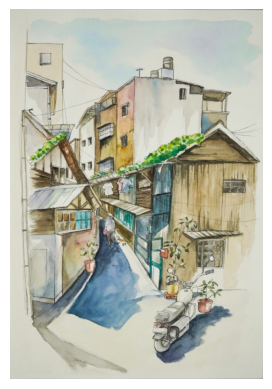

In [93]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0]) # download picture
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)
plt.axis('off')  # 不顯示坐標軸
plt.show()

In [94]:
complete_response = gemini_pro.complete(
    prompt="Please tell me the style of this painting using a specific artistic style, such as geometric style, realism, etc.",
    image_documents=image_documents,
)

print(complete_response)

 The painting is an example of watercolor painting. Watercolor painting is a painting method that uses water-based paint. Watercolor paintings are typically created on paper, but they can also be created on other surfaces, such as canvas or wood. Watercolor paintings are known for their light and airy feel, and they are often used to create landscapes, cityscapes, and still lifes.


In [97]:
stream_complete_respons = gemini_pro.stream_complete(
    prompt="Give me more information about this image",
    image_documents=image_documents,
)

In [98]:
for r in stream_complete_respons:
    print(r.text, end="")

 The image is a watercolor painting of a narrow street in a city. The street is lined with old, wooden houses and shops. There is a person walking down the street and a scooter parked on the side of the road. The painting is done in a realistic style and the artist has used a variety of colors to create a sense of depth and atmosphere.

In [99]:
stream_complete_response = gemini_pro.stream_complete(
    prompt="Could you please recommend five other artworks that share the same style as this painting",
    image_documents=image_documents,
)

In [100]:
for r in stream_complete_response:
    print(r.text, end="")

 Sure! Here are five other artworks that share a similar style to the painting you provided:

1. "Street Scene" by Zaria Forman
2. "Cityscape" by Edward Hopper
3. "The Street" by Pablo Picasso
4. "The City" by Marc Chagall
5. "The Town" by Wassily Kandinsky